 - [x] **Munendra Kumar**
 - [x] **HOOMACL20170010**
 - [x] **M.A. Computational Linguistics**
 - [x] **Semester 3**
 - [x] **LS176: NLP with Python**
 - [x] **Course Instructor: Dr. Atreyee Sharma**

# Step 1: Loading NLTK Depencies

In [91]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np

# Step 2: Loading a text file

## *I have used SMS SPAM COLLECTION DATASET by UCI MACHINE LEARNING from KAGGLE*

In [92]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head()
#prints the first five rows of the dataset

#print (sms[:10])
#prints the first 10 rows

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
sms.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
sms.dtypes


v1     int64
v2    object
dtype: object

In [95]:
sms.describe()

,v1
count,22288.000000
mean,0.134063
std,0.340728
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [96]:
cleansms= pd.read_csv('sms_cleanall.csv', encoding='latin-1')
cleansms.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


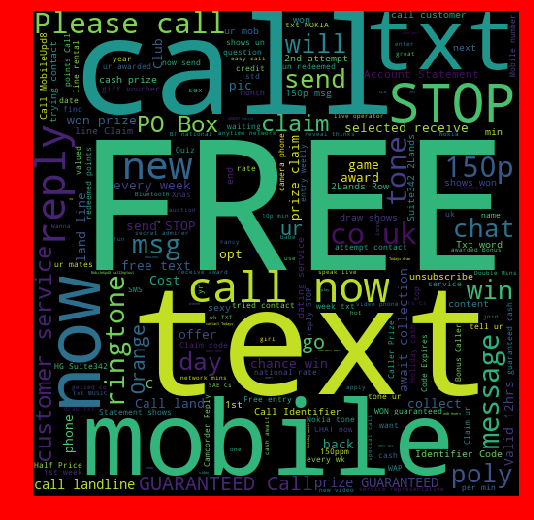

In [97]:
Freq_Spam_Words=''.join(list(cleansms[cleansms['v1']==1]['v2']))
spam_wc= WordCloud(width=501, height=501).generate(Freq_Spam_Words)
plt.figure(figsize=(10,20), facecolor='red')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

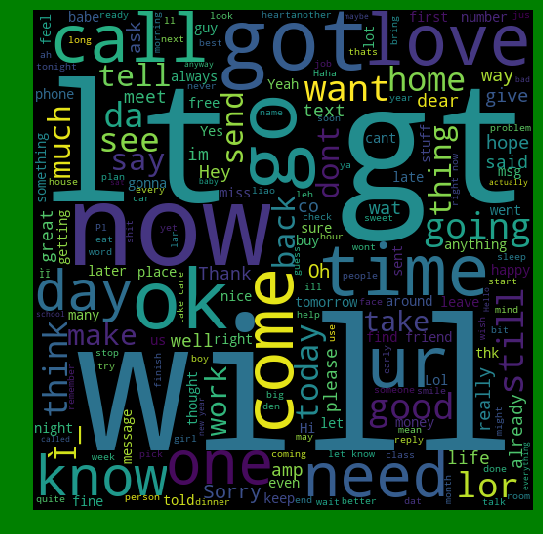

In [98]:
Freq_nonSpam_Words=''.join(list(cleansms[cleansms['v1']==0]['v2']))
nonspam_wc= WordCloud(width=512, height=512).generate(Freq_nonSpam_Words)
plt.figure(figsize=(30,10), facecolor='green')
plt.imshow(nonspam_wc)
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

### Continuing to what I did for mid-sem Project...Using the classifier and  dataset I have build  the machine learning model using Scikit learn for training of the dataset and testing it with about 99% precision and I have tested it against new mails from my gmail inbox and spam messages. It categorises them correctly.

*Note- You can test new mails by editing the field 'text' towards the bottom of the program*

## Importing dependencies

In [99]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# use MultinomialNB algorithm
from sklearn.naive_bayes import MultinomialNB

# import method for split train/test data set
from sklearn.model_selection import train_test_split

# import method to calculate metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')




## Creating Classifier

In [86]:
def spam_filter():
    # prepare data
    data = pd.read_csv("spam.csv", header=0, encoding="latin-1")
    data.head()
    #
    tfidf_vect = TfidfVectorizer()
    dtm = tfidf_vect.fit_transform(data["v2"])
    print("size of tfidf matrix:", dtm.shape)
    print("total number of words:", len(tfidf_vect.vocabulary_))
    voc_lookup = {tfidf_vect.vocabulary_[word]: word for word in tfidf_vect.vocabulary_}

    print("\nOriginal text: \n" + data["v2"][0])
    print("\ntfidf weights: \n")

    # covert the sparse matrix row to a dense array
    doc0 = dtm[0].toarray()[0]
    print(doc0.shape)


    # # split dataset for 70% train and 30% test
    X_train, X_test, y_train, y_test = train_test_split(dtm, data["v1"], test_size=.05, random_state=0)
    clf = MultinomialNB().fit(X_train, y_train)
    #
    # predict the news group for the test dataset
    predicted = clf.predict(X_test)
    #
    labels = ['0', '1']
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predicted, labels=labels)
    print("labels: ", labels)
    print("Labels to be interpreted as: Ham=0,Spam=1")
    print("precision: ", precision)
    print("recall: ", recall)
    print("f-score: ", fscore)
    print("support: ", support)
    print(classification_report(y_test, predicted, target_names=labels))
    return tfidf_vect, clf

## Creating classifier for Predicting new messages

In [87]:
def predect_new(tfidf_vect, clf, text):
    labels = ['0', '1']
    new_text_tfidf = tfidf_vect.transform(text)
    print(new_text_tfidf)
    print(new_text_tfidf.shape)
    predicted_p = clf.predict_proba(new_text_tfidf)
    predicted = clf.predict(new_text_tfidf)
    for idx, doc in enumerate(text):
        print('\n', doc)
        for j, label in enumerate(labels):
            print('% s: %.3f' % (labels[j], predicted_p[idx][j]))
        print('%r => %s' % (doc, predicted[idx]))
        





## Edit the list of messages in the 'text' field for prediction.

In [88]:
if __name__ == '__main__':

#        generate tfidf matrix and a NB model
    
    tfidf_vect, clf = spam_filter()
# input : list of email text
        
    text = ["""FreeMsg Heyd no word back! ? Tb ok! XxX std chgs to send, �1.50 to rcv.""",
    """FreeMsg free trip to at just $10 call now""",'''26-27 ноября в Москве состоится Synergy Global Forum. 
 
На сцене 40+ спикеров, среди которых: 

•    голливудский актер Ричард Гир, 
•    реальный «Волк с Уолл-стрит» Джордан Белфорт, 
•    глава судейского комитета FIFA Пьерлуиджи Коллина, 
•    чемпион UFC Хабиб Нурмагомедов, 
•    первый спикер-андроид робот София,
•    и многие другие. 

 
Помимо этого, вас ждут открытые встречи с известными 
российскими бизнес-экспертами и панельные дискуссии 
с участием роботов и мировых знаменитостей. Присоединяйтесь!
''','''Hello munendra,

Here is the last chance to get FLAT 25% discount
on Premium Membership Upgrade* for only Rs. 885(including GST)
and save Rs. 295 before time runs out.

Grab your last to last chance to get your
Premium Membership Upgraded just for Rs. 885.
Hurry Up! Only 1 day left. Offer valid till Saturday, 
i.e. 1st Dec 2018.Rush to TheTuitionTeacher office or 
call us at 8573-999-666 (Mon to Sat : 10 AM to 6 PM)
and grab this offer to Save 25% on your
Premium Membership Upgrade.
''','''
noreply@mailer.last.fm
Sun, Nov 18, 6:45 PM (13 days ago)
to me

Hello!

Thank you for joining Last.fm.

Verify your email address and start using Last.fm here:
https://www.last.fm/join/verify?token=ebmJmIjoxNTQlhBFrJyR6nMweP-Jdoh5htZE-KW8#confirm=true

(Psst! If this wasn’t you, don’t worry; we won’t email you again)


Thanks,
The Last.fm Team
''']

size of tfidf matrix: (22288, 8709)
total number of words: 8709

Original text: 
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

tfidf weights: 

(8709,)
labels:  ['0', '1']
Labels to be interpreted as: Ham=0,Spam=1
precision:  [0.99189463 1.        ]
recall:  [1.         0.94117647]
f-score:  [0.99593082 0.96969697]
support:  [979 136]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00       979
          1       1.00      0.94      0.97       136

avg / total       0.99      0.99      0.99      1115



In [89]:
    print("Labels to be interpreted as: Ham=0,Spam=1")
    predect_new(tfidf_vect, clf,text)

Labels to be interpreted as: Ham=0,Spam=1
  (0, 8540)	0.2664202283180188
  (0, 8465)	0.2603232763107822
  (0, 7739)	0.19139748744818577
  (0, 7513)	0.3559510027972087
  (0, 7214)	0.3135844966080012
  (0, 6709)	0.18959983300840855
  (0, 6238)	0.3836305401825367
  (0, 5487)	0.17380300527420015
  (0, 5350)	0.1649491386198814
  (0, 3353)	0.3032963714676061
  (0, 1990)	0.4092122230944275
  (0, 1339)	0.20165605850343918
  (0, 598)	0.2427715247497049
  (1, 7856)	0.4629220608132452
  (1, 7739)	0.15382162102326022
  (1, 5403)	0.24128748220273424
  (1, 4335)	0.26154573876616644
  (1, 3353)	0.4875042000982367
  (1, 3346)	0.2931644868655872
  (1, 1804)	0.23204171425992598
  (1, 1247)	0.2585057912042315
  (1, 299)	0.43719776905689317
  (2, 3529)	0.4306000199130578
  (2, 3320)	0.4036812903404862
  (2, 3173)	0.4306000199130578
  :	:
  (4, 7596)	0.09116668174546304
  (4, 7525)	0.1136794325708073
  (4, 7370)	0.09974097769014319
  (4, 7196)	0.08974238755232057
  (4, 5878)	0.0972696025126696
  (4, 4922)	